In [2]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [3]:
duration = pd.read_csv('duration.csv', delimiter=";")
stainless_steel_energy = pd.read_csv('stainless_steel_energy.csv',  delimiter=";")
duration = duration.apply(lambda x: x.astype(str).str.split(";"))

In [4]:
for col in duration.columns:
    duration[col]=duration[col].astype(str).str.split(";",expand=True)

duration.head()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
0,['25'],['S6'],['1.4021'],['399'],['300'],['30'],"['51,1980186835613']",['1'],['50501.0'],"['5100,000000']"
1,['25'],['S6'],['1.4021'],['399'],['300'],['30'],"['51,1980186835613']",['1'],['50501.0'],"['12240,000000']"
2,['25'],['S6'],['1.4021'],['399'],['300'],['30'],"['51,1980186835613']",['1'],['50501.0'],"['4080,000000']"
3,['25'],['S6'],['1.4021'],['399'],['300'],['30'],"['51,1980186835613']",['1'],['50501.0'],"['9120,000000']"
4,['25'],['S6'],['1.4021'],['399'],['300'],['30'],"['51,1980186835613']",['1'],['50501.0'],"['30600,000000']"


In [5]:
duration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12687 entries, 0 to 12686
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   product_id                12687 non-null  object
 1   productcategory_id        12687 non-null  object
 2   material_id               12687 non-null  object
 3   outer_diameter            12687 non-null  object
 4   inner_diameter            12687 non-null  object
 5   height                    12687 non-null  object
 6   weight                    12687 non-null  object
 7   heattreatmentcategory_id  12687 non-null  object
 8   workplace_id              12687 non-null  object
 9   duration_seconds          12687 non-null  object
dtypes: object(10)
memory usage: 991.3+ KB


In [6]:
duration.describe()

,product_id,productcategory_id,material_id,outer_diameter,inner_diameter,height,weight,heattreatmentcategory_id,workplace_id,duration_seconds
count,12687,12687,12687,12687,12687,12687,12687,12687,12687,12687
unique,2851,6,139,696,645,322,1993,6,20,487
top,['4721'],['S6'],['1.4034'],['710'],['220'],['50'],"['26,0626526541809']",['0'],['nan'],"['0,000000']"
freq,47,10614,1312,189,231,444,83,5418,5339,596


In [7]:
for col in stainless_steel_energy.columns:
    stainless_steel_energy[col]=stainless_steel_energy[col].astype(str).str.split(";",expand=True)
    
stainless_steel_energy.head()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
0,S6,1.4021,399,30,"51,1980186835613",1,nan,nan,nan,0,50513,25,2012-04-16 13:25:00,58
1,S6,1.4021,399,30,"51,1980186835613",1,nan,nan,nan,0,50513,25,2012-04-16 13:26:00,58
2,S6,1.4021,399,30,"51,1980186835613",1,nan,nan,nan,0,50513,25,2012-04-16 13:27:00,58
3,S6,1.4021,399,30,"51,1980186835613",1,nan,nan,nan,0,50513,25,2012-04-16 13:28:00,58
4,S6,1.4021,399,30,"51,1980186835613",1,nan,nan,nan,0,50513,25,2012-04-16 13:29:00,58


In [8]:
stainless_steel_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40582 entries, 0 to 40581
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   productcategory_id          40582 non-null  object
 1   material_id                 40582 non-null  object
 2   outer_diameter              40582 non-null  object
 3   height                      40582 non-null  object
 4   weight                      40582 non-null  object
 5   heattreatmentcategory_id    40582 non-null  object
 6   heattreatment_temperatures  40582 non-null  object
 7   forming_temperatures        40582 non-null  object
 8   dimension                   40582 non-null  object
 9   input_weight                40582 non-null  object
 10  workplace_id                40582 non-null  object
 11  product_id                  40582 non-null  object
 12  mes_datetime                40582 non-null  object
 13  value                       40582 non-null  ob

In [9]:
stainless_steel_energy.describe()

,productcategory_id,material_id,outer_diameter,height,weight,heattreatmentcategory_id,heattreatment_temperatures,forming_temperatures,dimension,input_weight,workplace_id,product_id,mes_datetime,value
count,40582,40582,40582,40582,40582,40582,40582,40582,40582,40582,40582,40582,40582,40582
unique,5,129,623,305,1670,6,1,1,1,1,4,2331,37672,289
top,S6,1.4034,710,50,"26,0626526541809",0,nan,nan,nan,0,50513,4721,2012-03-22 17:24:00,66
freq,37702,6090,1151,1342,982,19775,40582,40582,40582,40582,30949,744,4,1870


In [10]:
duration.shape, stainless_steel_energy.shape

((12687, 10), (40582, 14))

In [11]:
stainless_steel_energy.isnull().sum()

productcategory_id            0
material_id                   0
outer_diameter                0
height                        0
weight                        0
heattreatmentcategory_id      0
heattreatment_temperatures    0
forming_temperatures          0
dimension                     0
input_weight                  0
workplace_id                  0
product_id                    0
mes_datetime                  0
value                         0
dtype: int64

In [12]:
duration.isnull().sum()

product_id                  0
productcategory_id          0
material_id                 0
outer_diameter              0
inner_diameter              0
height                      0
weight                      0
heattreatmentcategory_id    0
workplace_id                0
duration_seconds            0
dtype: int64

<Axes: >

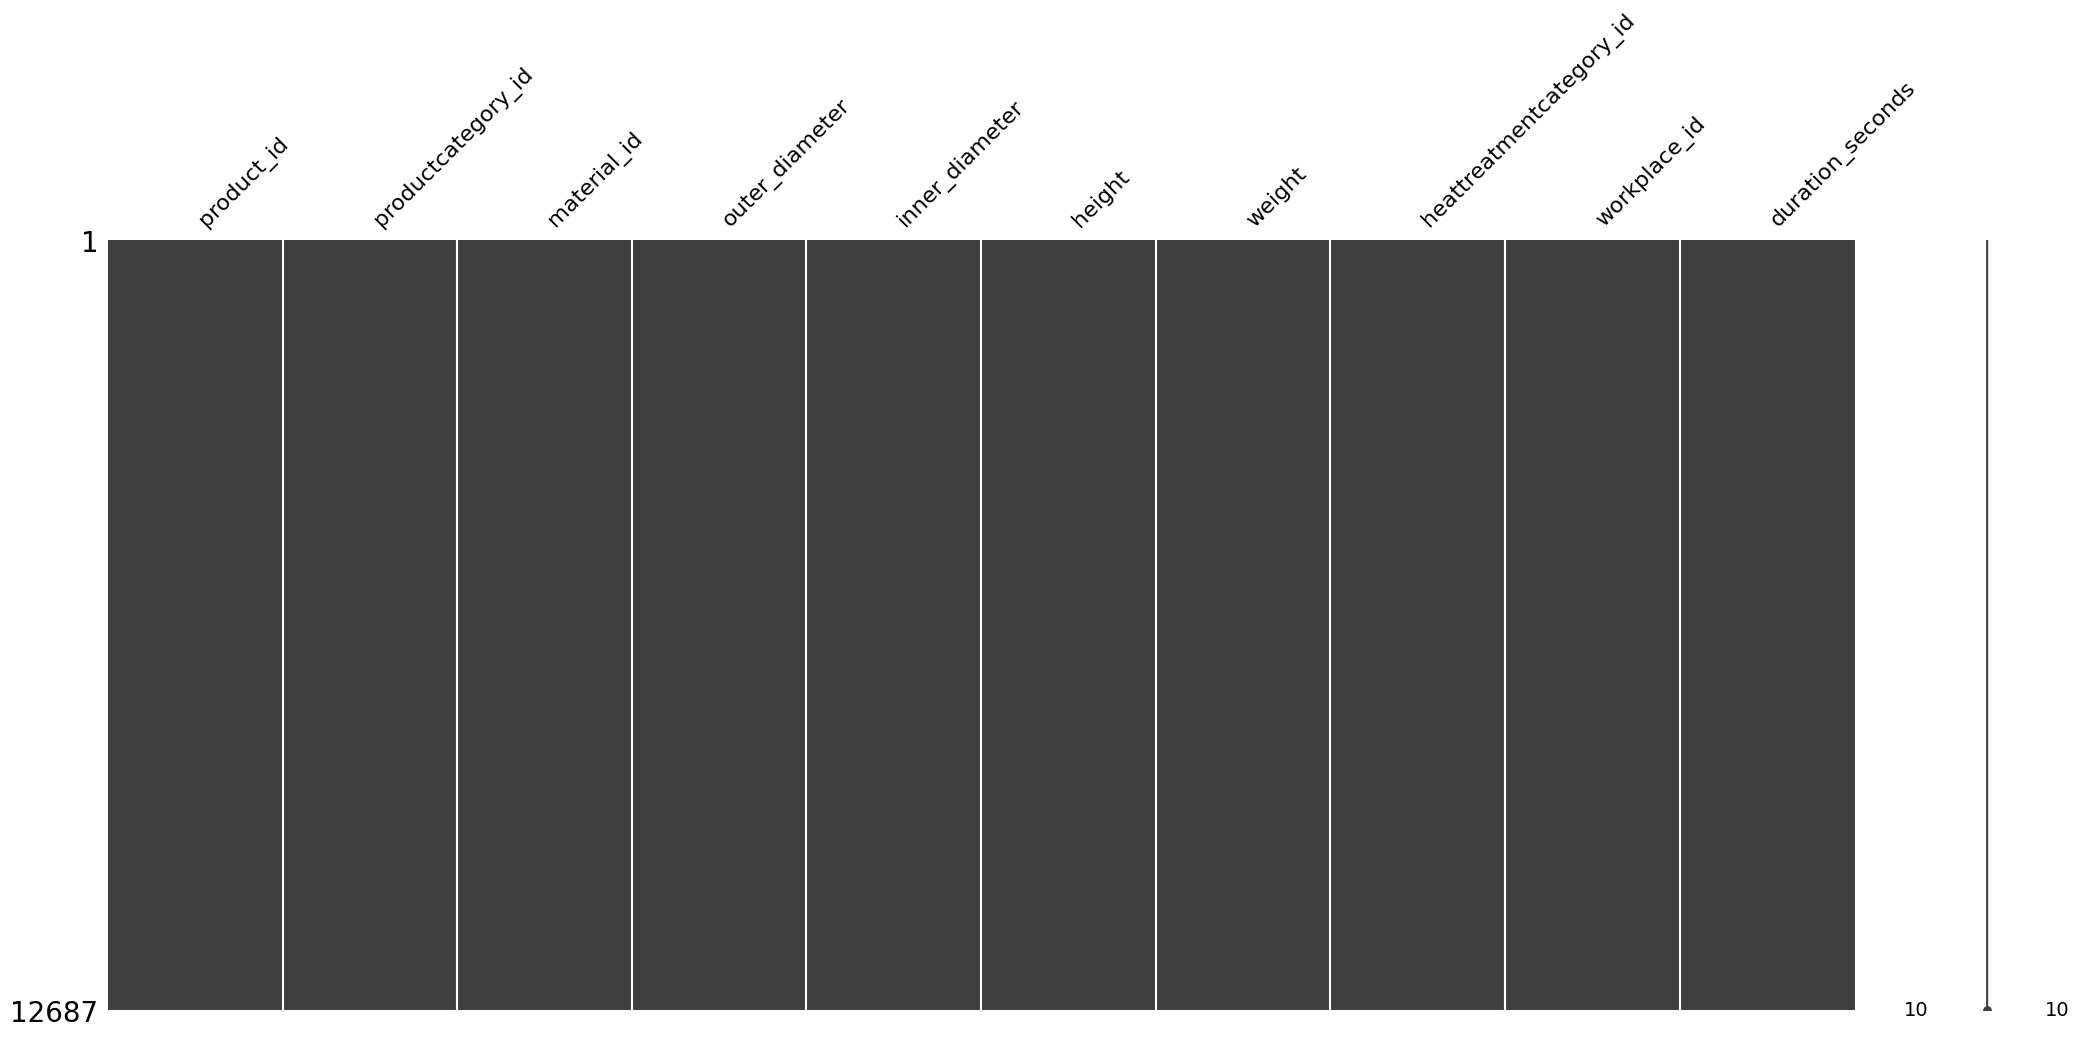

In [13]:
msno.matrix(duration)

<Axes: >

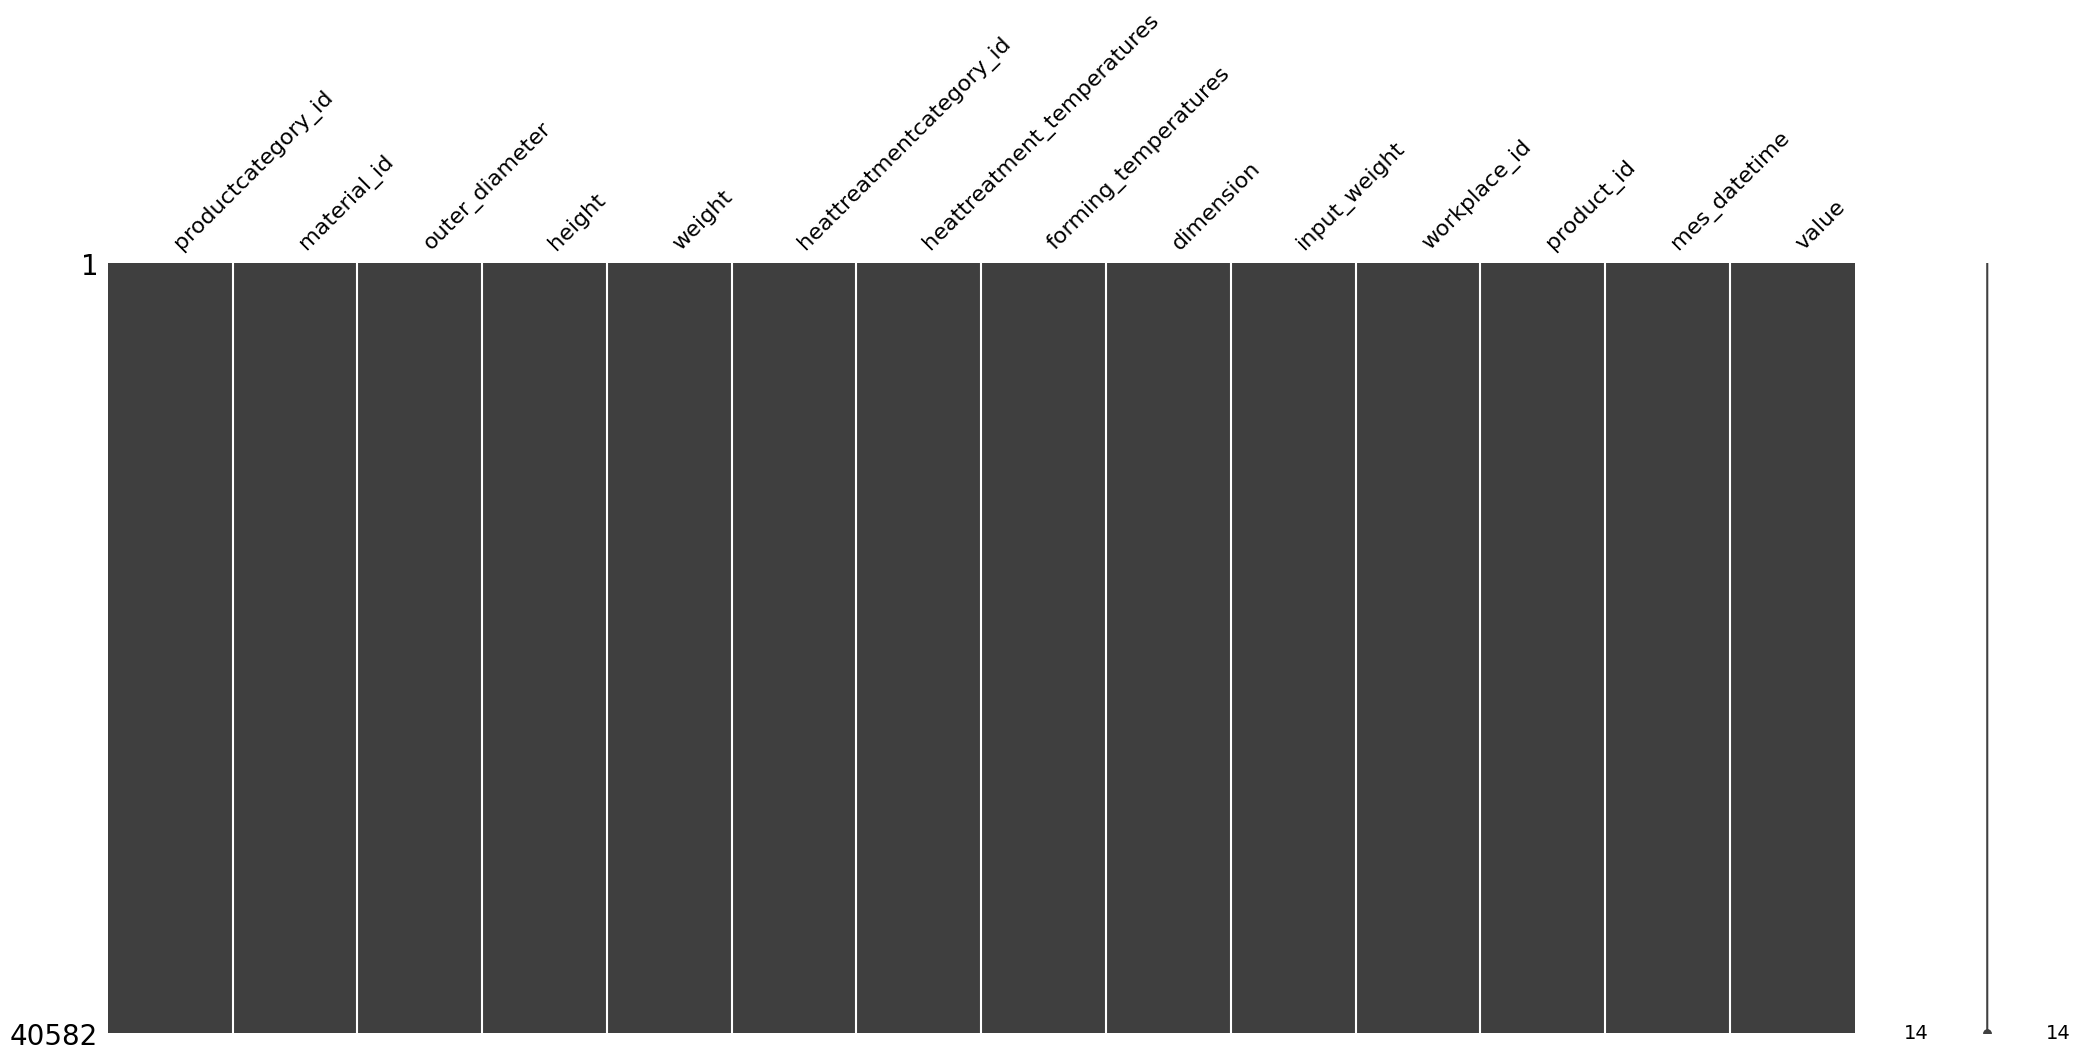

In [14]:
msno.matrix(stainless_steel_energy)

In [ ]:
duration.duplicated().sum()

np.int64(412)

In [20]:
duration.drop_duplicates

<bound method DataFrame.drop_duplicates of       product_id productcategory_id material_id outer_diameter inner_diameter  \
0         ['25']             ['S6']  ['1.4021']        ['399']        ['300']   
1         ['25']             ['S6']  ['1.4021']        ['399']        ['300']   
2         ['25']             ['S6']  ['1.4021']        ['399']        ['300']   
3         ['25']             ['S6']  ['1.4021']        ['399']        ['300']   
4         ['25']             ['S6']  ['1.4021']        ['399']        ['300']   
...          ...                ...         ...            ...            ...   
12682   ['7361']             ['S1']  ['2.4856']        ['394']        ['282']   
12683   ['7362']             ['S1']  ['1.3964']        ['950']        ['849']   
12684   ['7365']             ['S1']  ['2.4856']        ['285']        ['217']   
12685   ['7366']             ['S1']  ['2.4856']        ['219']        ['152']   
12686   ['7372']             ['S1']  ['1.4301']        ['300']    

In [17]:
stainless_steel_energy.duplicated().sum()

np.int64(269)

In [21]:
stainless_steel_energy.drop_duplicates

<bound method DataFrame.drop_duplicates of       productcategory_id material_id outer_diameter height            weight  \
0                     S6      1.4021            399     30  51,1980186835613   
1                     S6      1.4021            399     30  51,1980186835613   
2                     S6      1.4021            399     30  51,1980186835613   
3                     S6      1.4021            399     30  51,1980186835613   
4                     S6      1.4021            399     30  51,1980186835613   
...                  ...         ...            ...    ...               ...   
40577                 S1      1.4006            614     39  219,290078724405   
40578                 S1      1.4006            614     39  219,290078724405   
40579                 S6      1.4034            484    143   500,21221115346   
40580                 S6      1.4034            484    143   500,21221115346   
40581                 S6      1.4034            484    143   500,21221115346 

In [22]:
duration.dtypes

product_id                  object
productcategory_id          object
material_id                 object
outer_diameter              object
inner_diameter              object
height                      object
weight                      object
heattreatmentcategory_id    object
workplace_id                object
duration_seconds            object
dtype: object

In [19]:
stainless_steel_energy.dtypes

productcategory_id            object
material_id                   object
outer_diameter                object
height                        object
weight                        object
heattreatmentcategory_id      object
heattreatment_temperatures    object
forming_temperatures          object
dimension                     object
input_weight                  object
workplace_id                  object
product_id                    object
mes_datetime                  object
value                         object
dtype: object

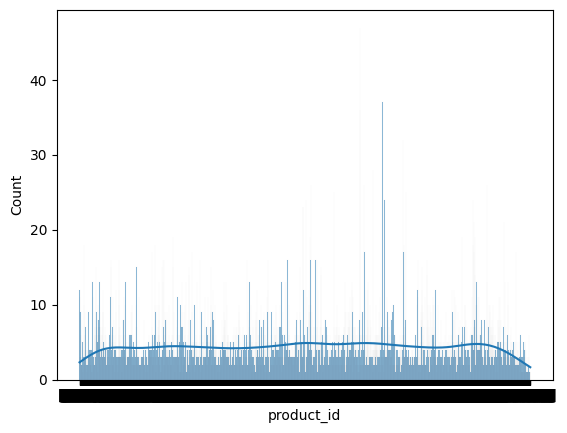

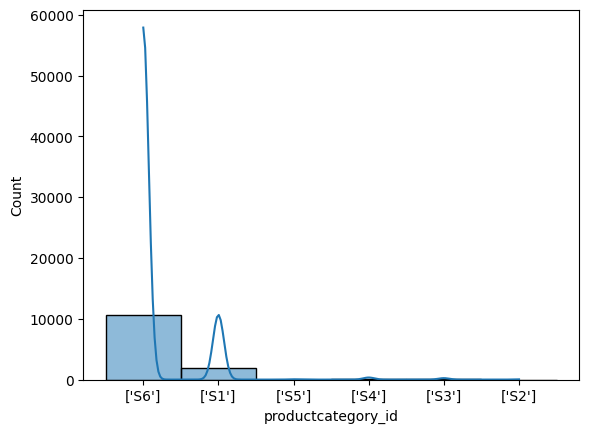

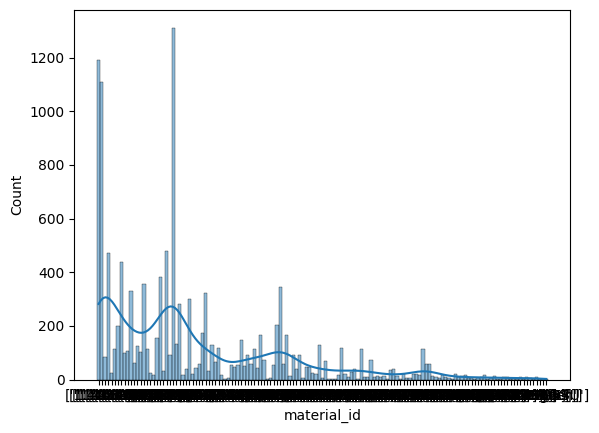

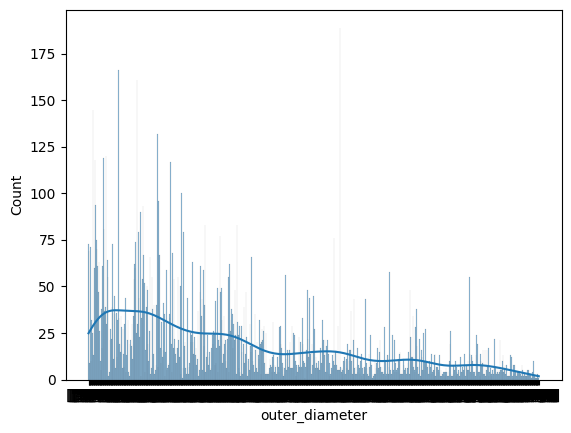

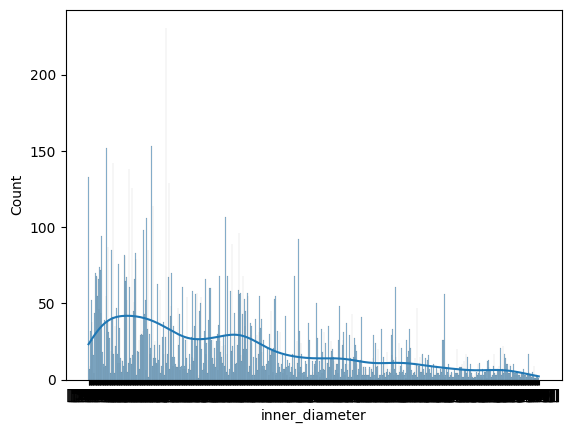

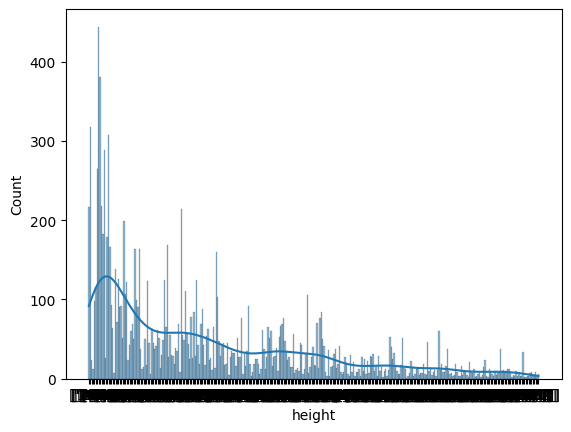

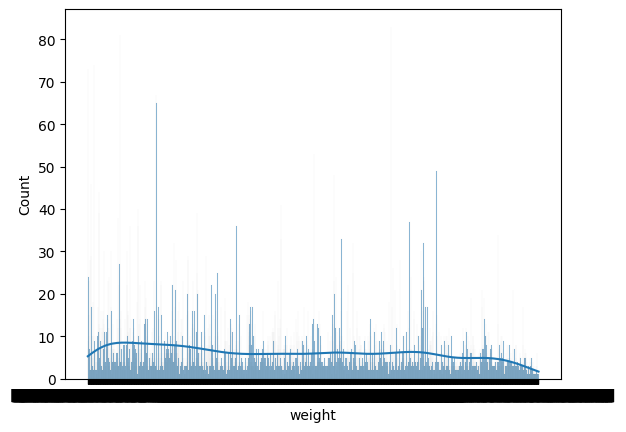

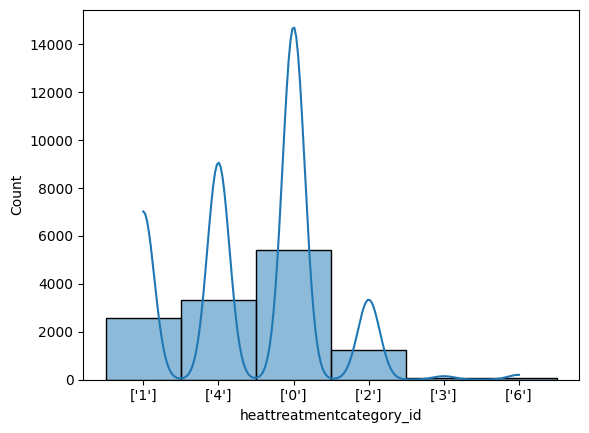

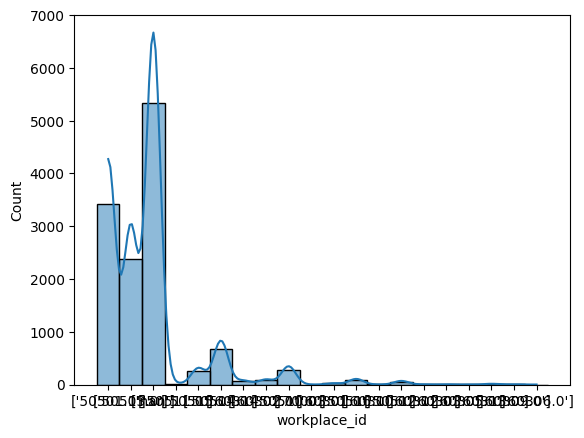

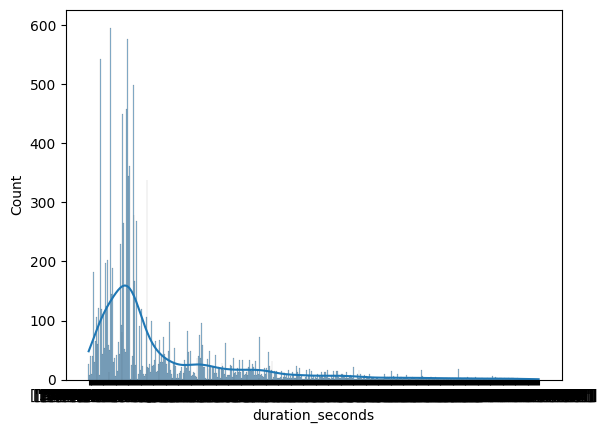

In [28]:
for col in duration.columns:
    sns.histplot(duration[col], bins=30, kde=True)
    plt.show()

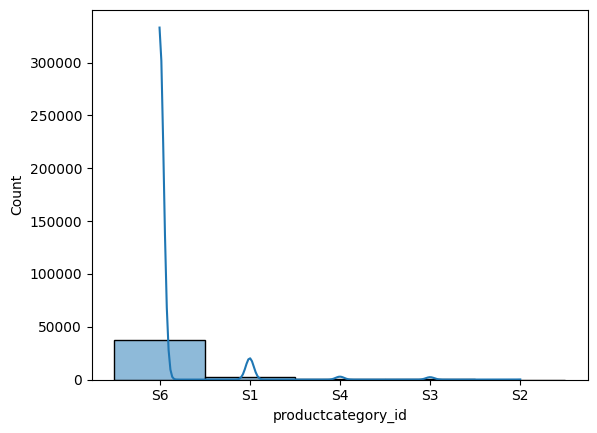

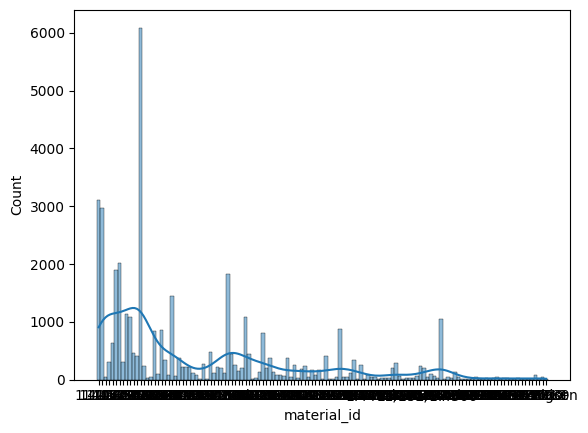

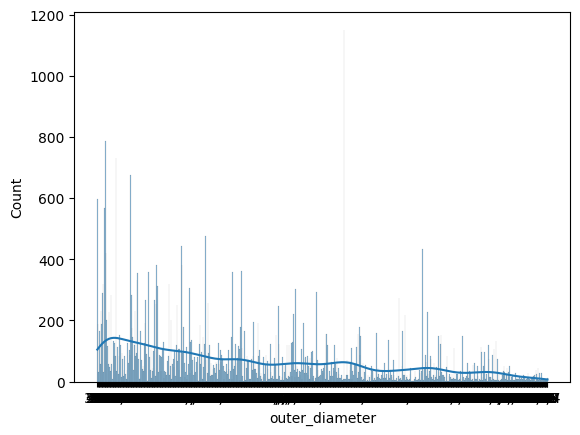

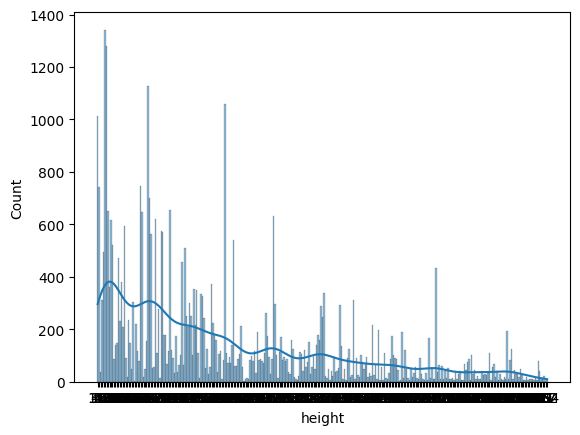

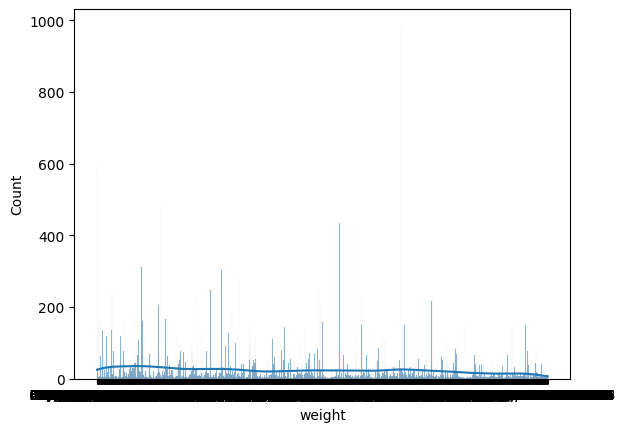

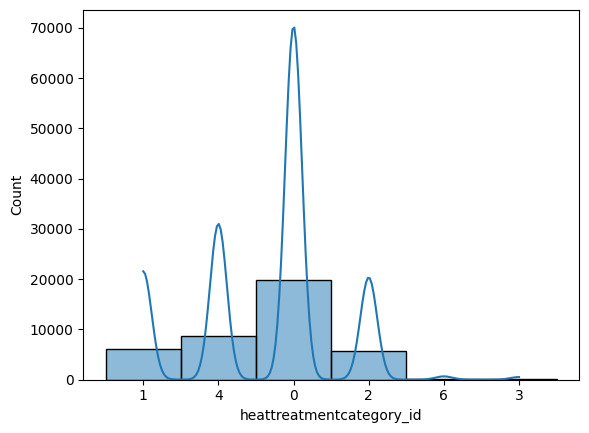

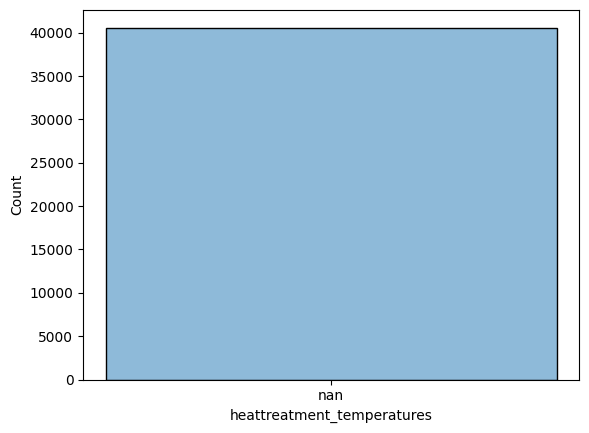

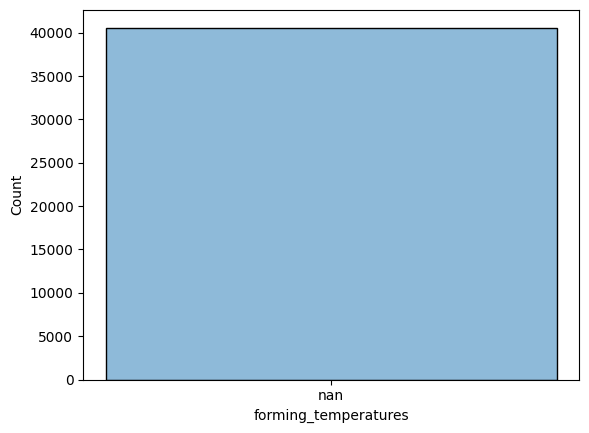

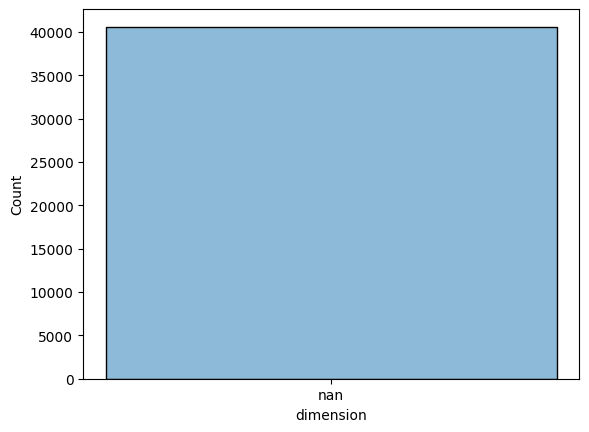

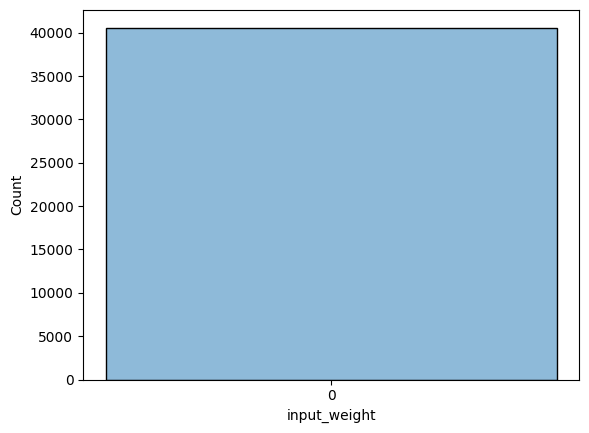

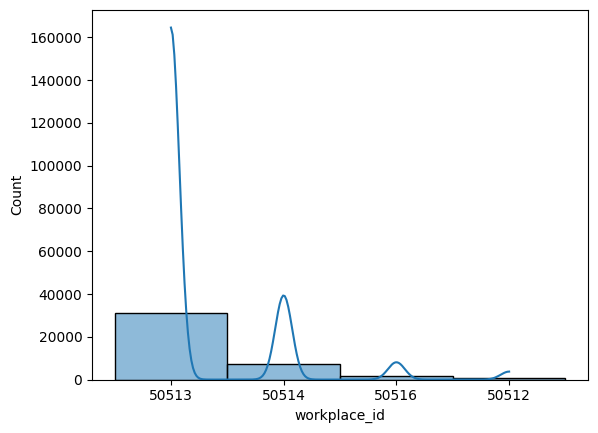

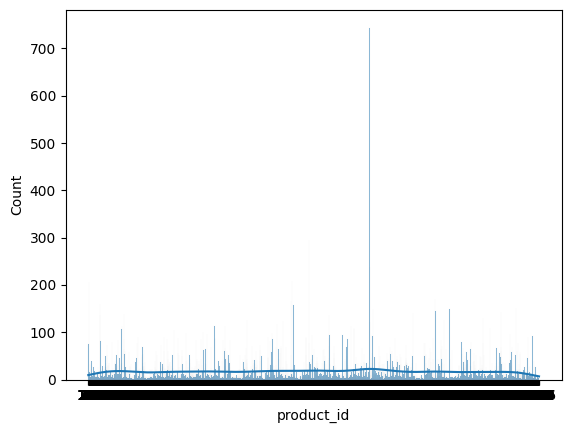

KeyboardInterrupt: 

In [29]:
for col in stainless_steel_energy.columns:
    sns.histplot(stainless_steel_energy[col], bins=30, kde=True)
    plt.show()

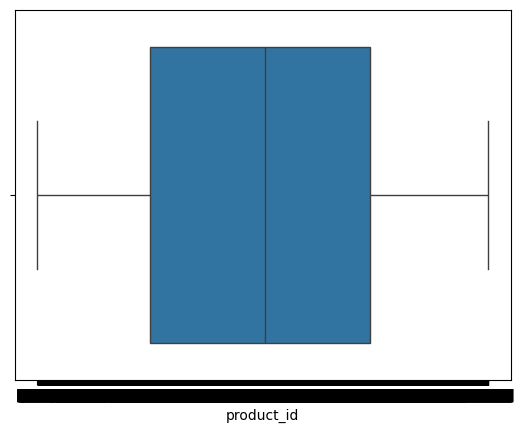

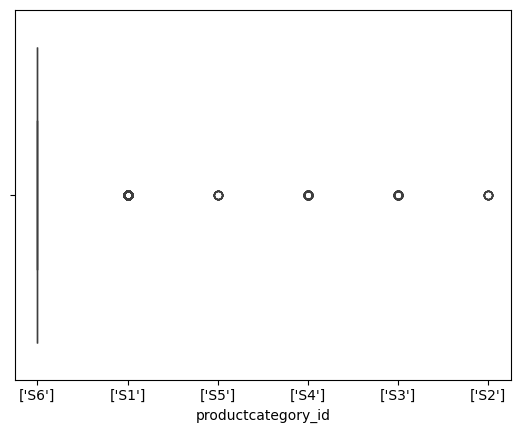

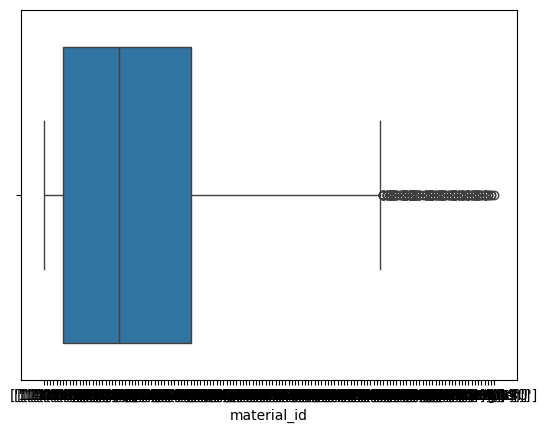

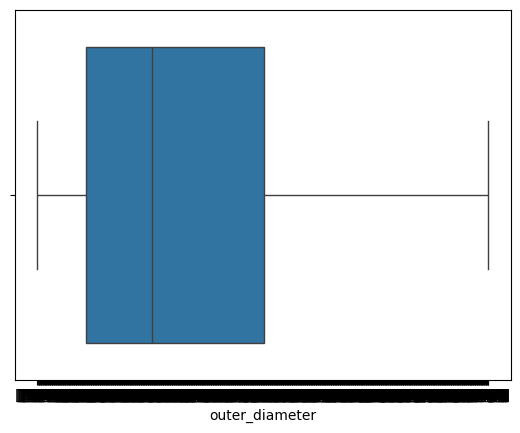

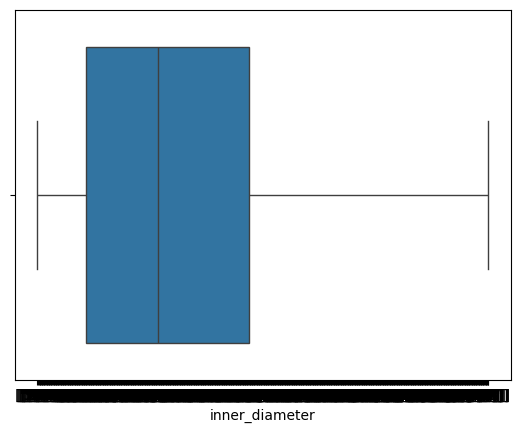

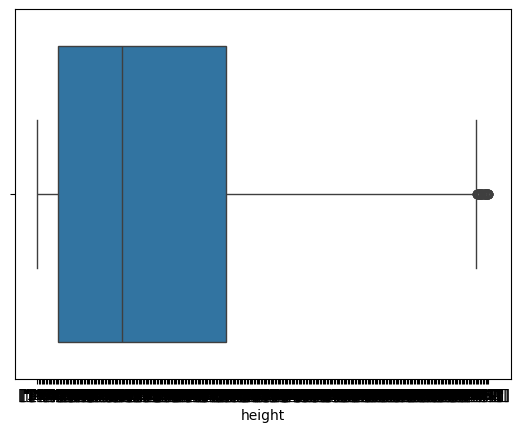

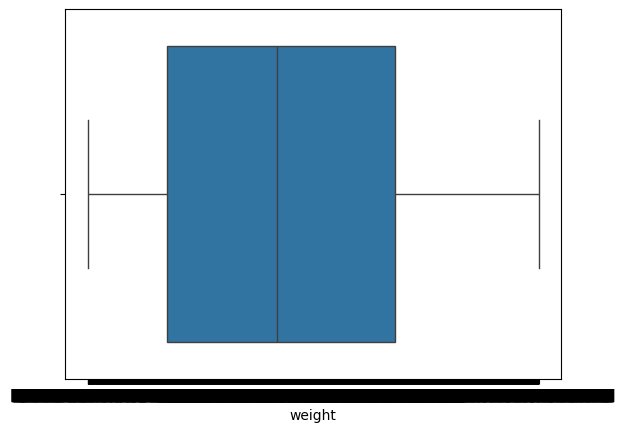

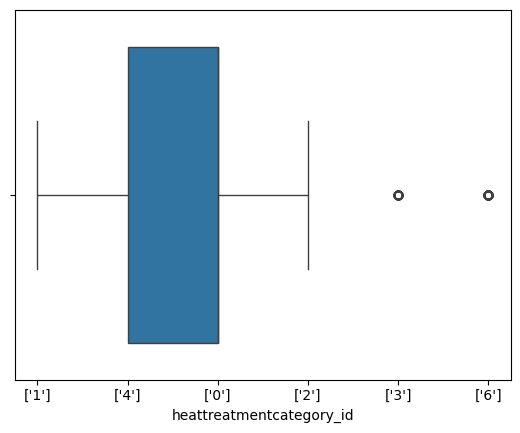

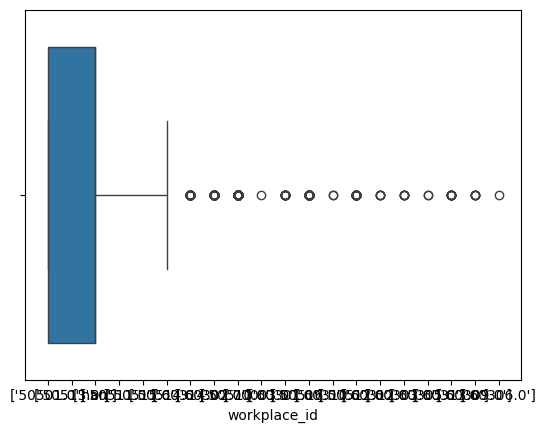

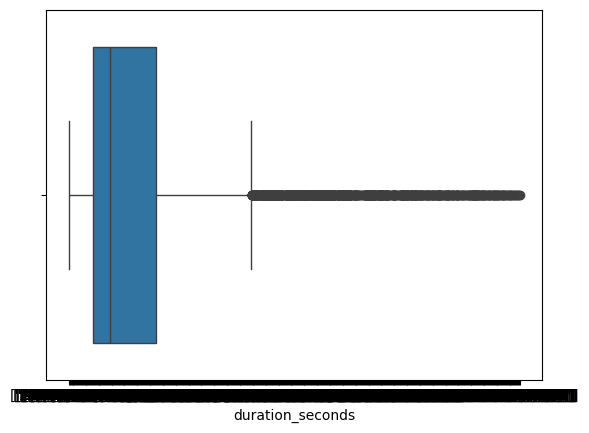

In [30]:
for col in duration.columns:
    sns.boxplot(x=duration[col])
    plt.show()

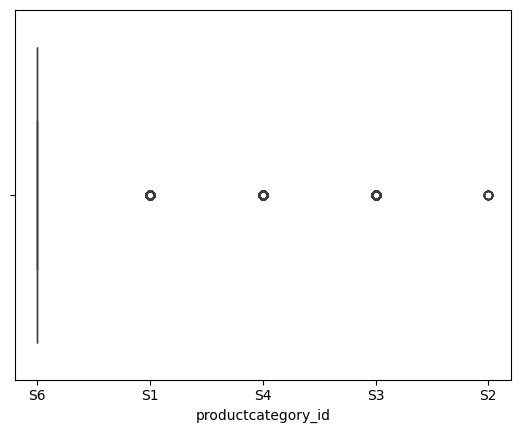

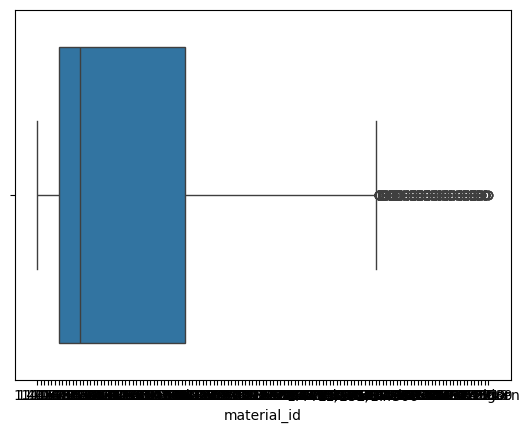

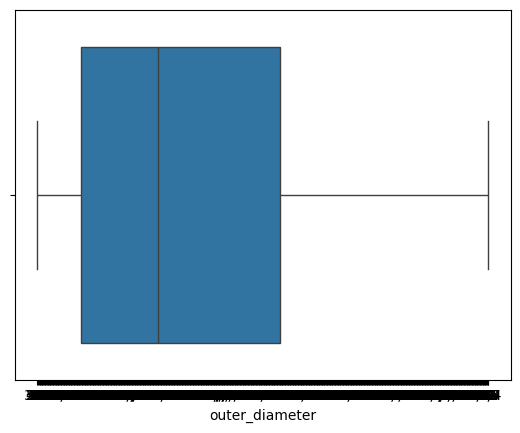

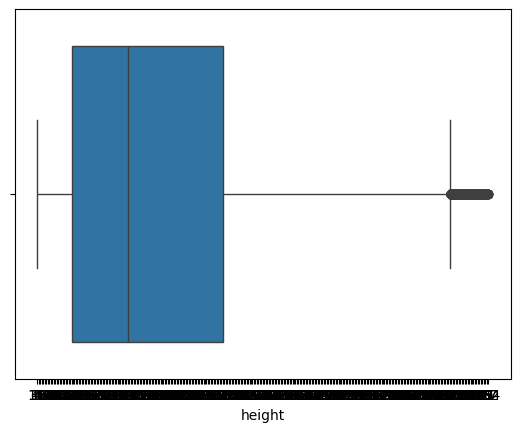

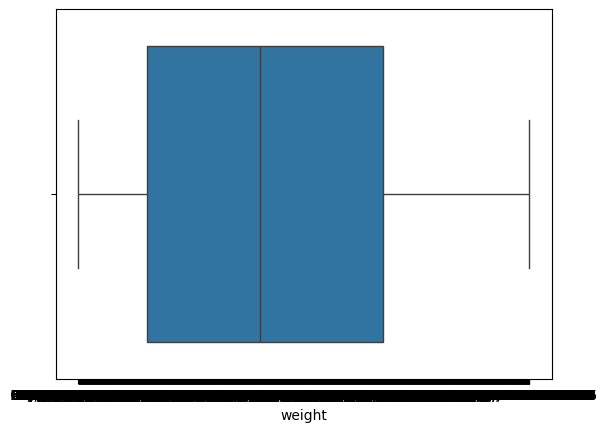

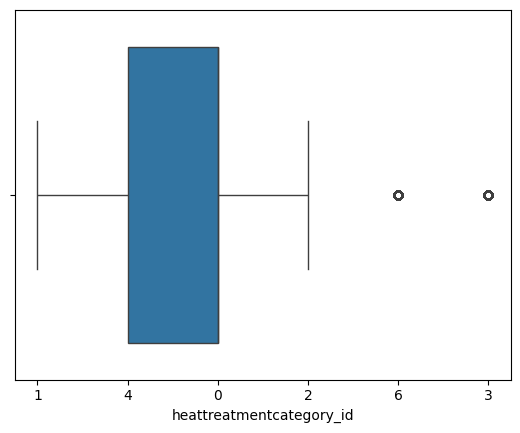

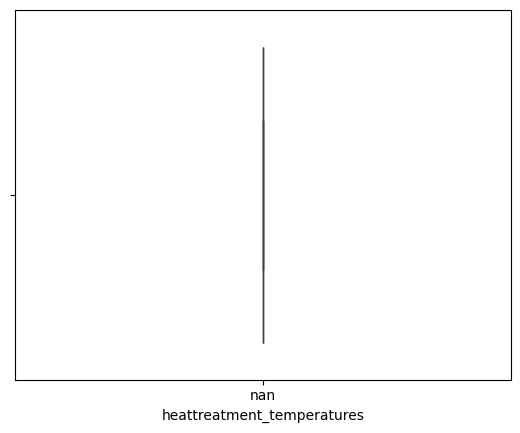

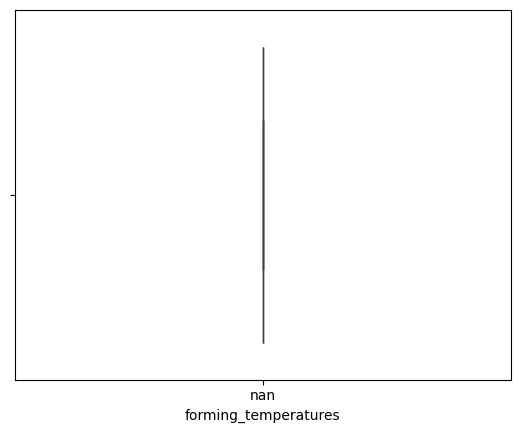

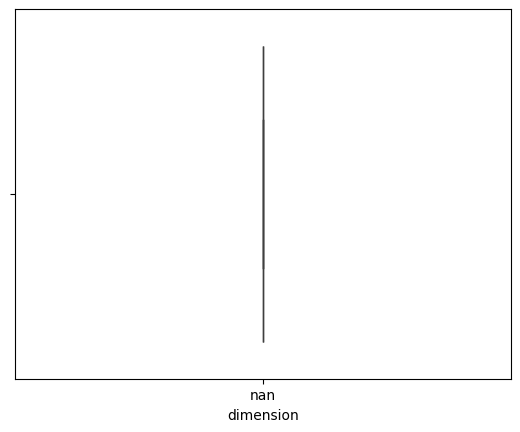

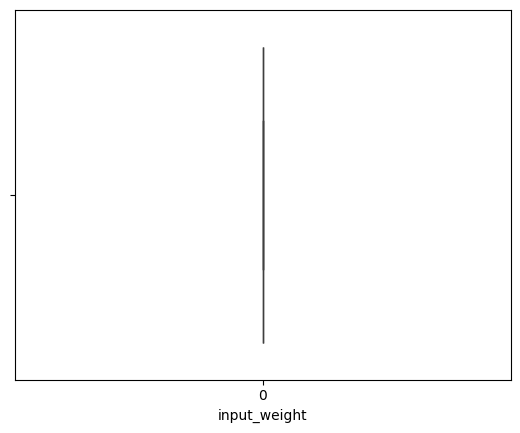

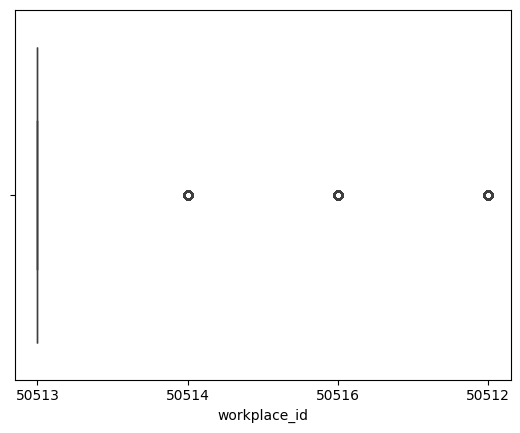

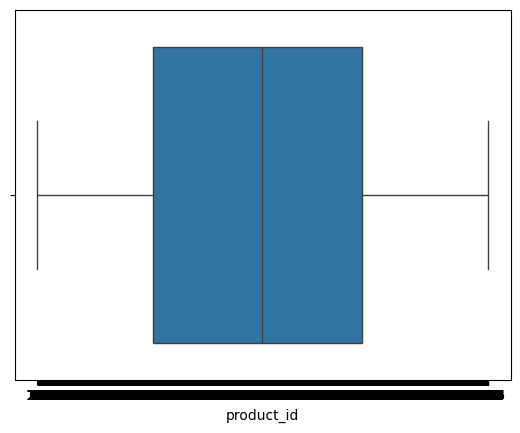

KeyboardInterrupt: 

In [ ]:
for col in stainless_steel_energy.columns:
    sns.boxplot(x=stainless_steel_energy[col])
    plt.show()
#the second last column is date
#remove the nan columns?
#convert object to int?

c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\jmeri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


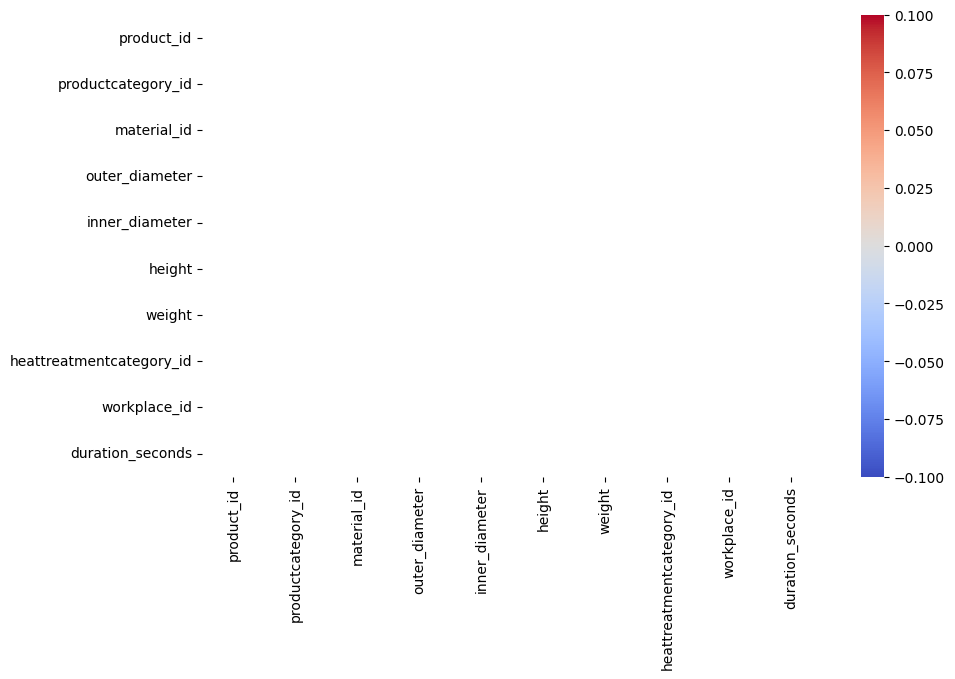

In [33]:
# Convert entire DataFrame to numeric, forcing errors to NaN
duration = duration.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = duration.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

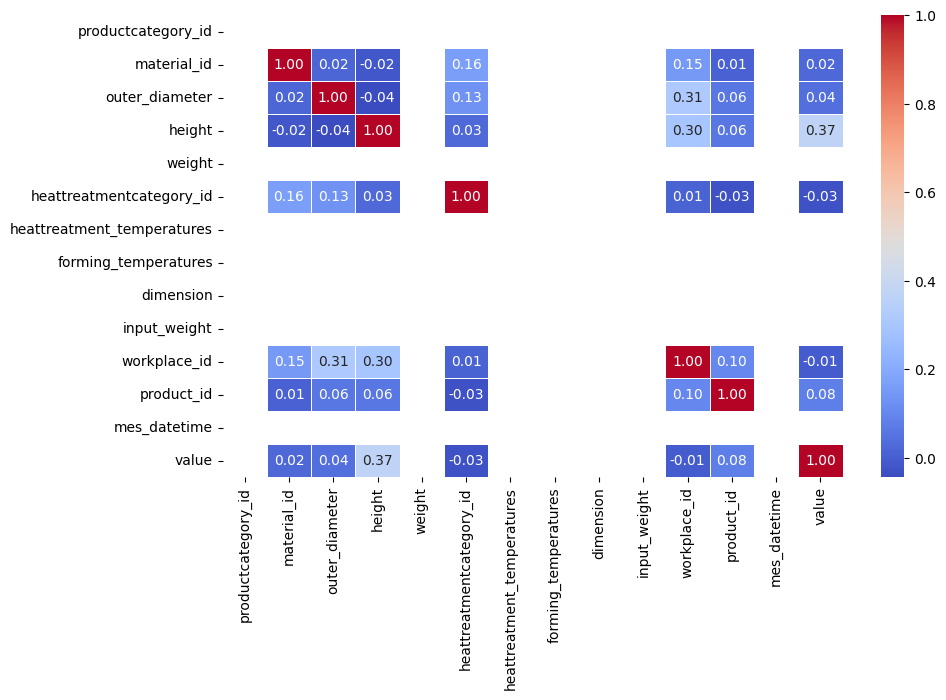

In [34]:
# Convert entire DataFrame to numeric, forcing errors to NaN
stainless_steel_energy = stainless_steel_energy.apply(pd.to_numeric, errors='coerce')

# Compute correlation matrix
corr_matrix = stainless_steel_energy.corr()

# Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

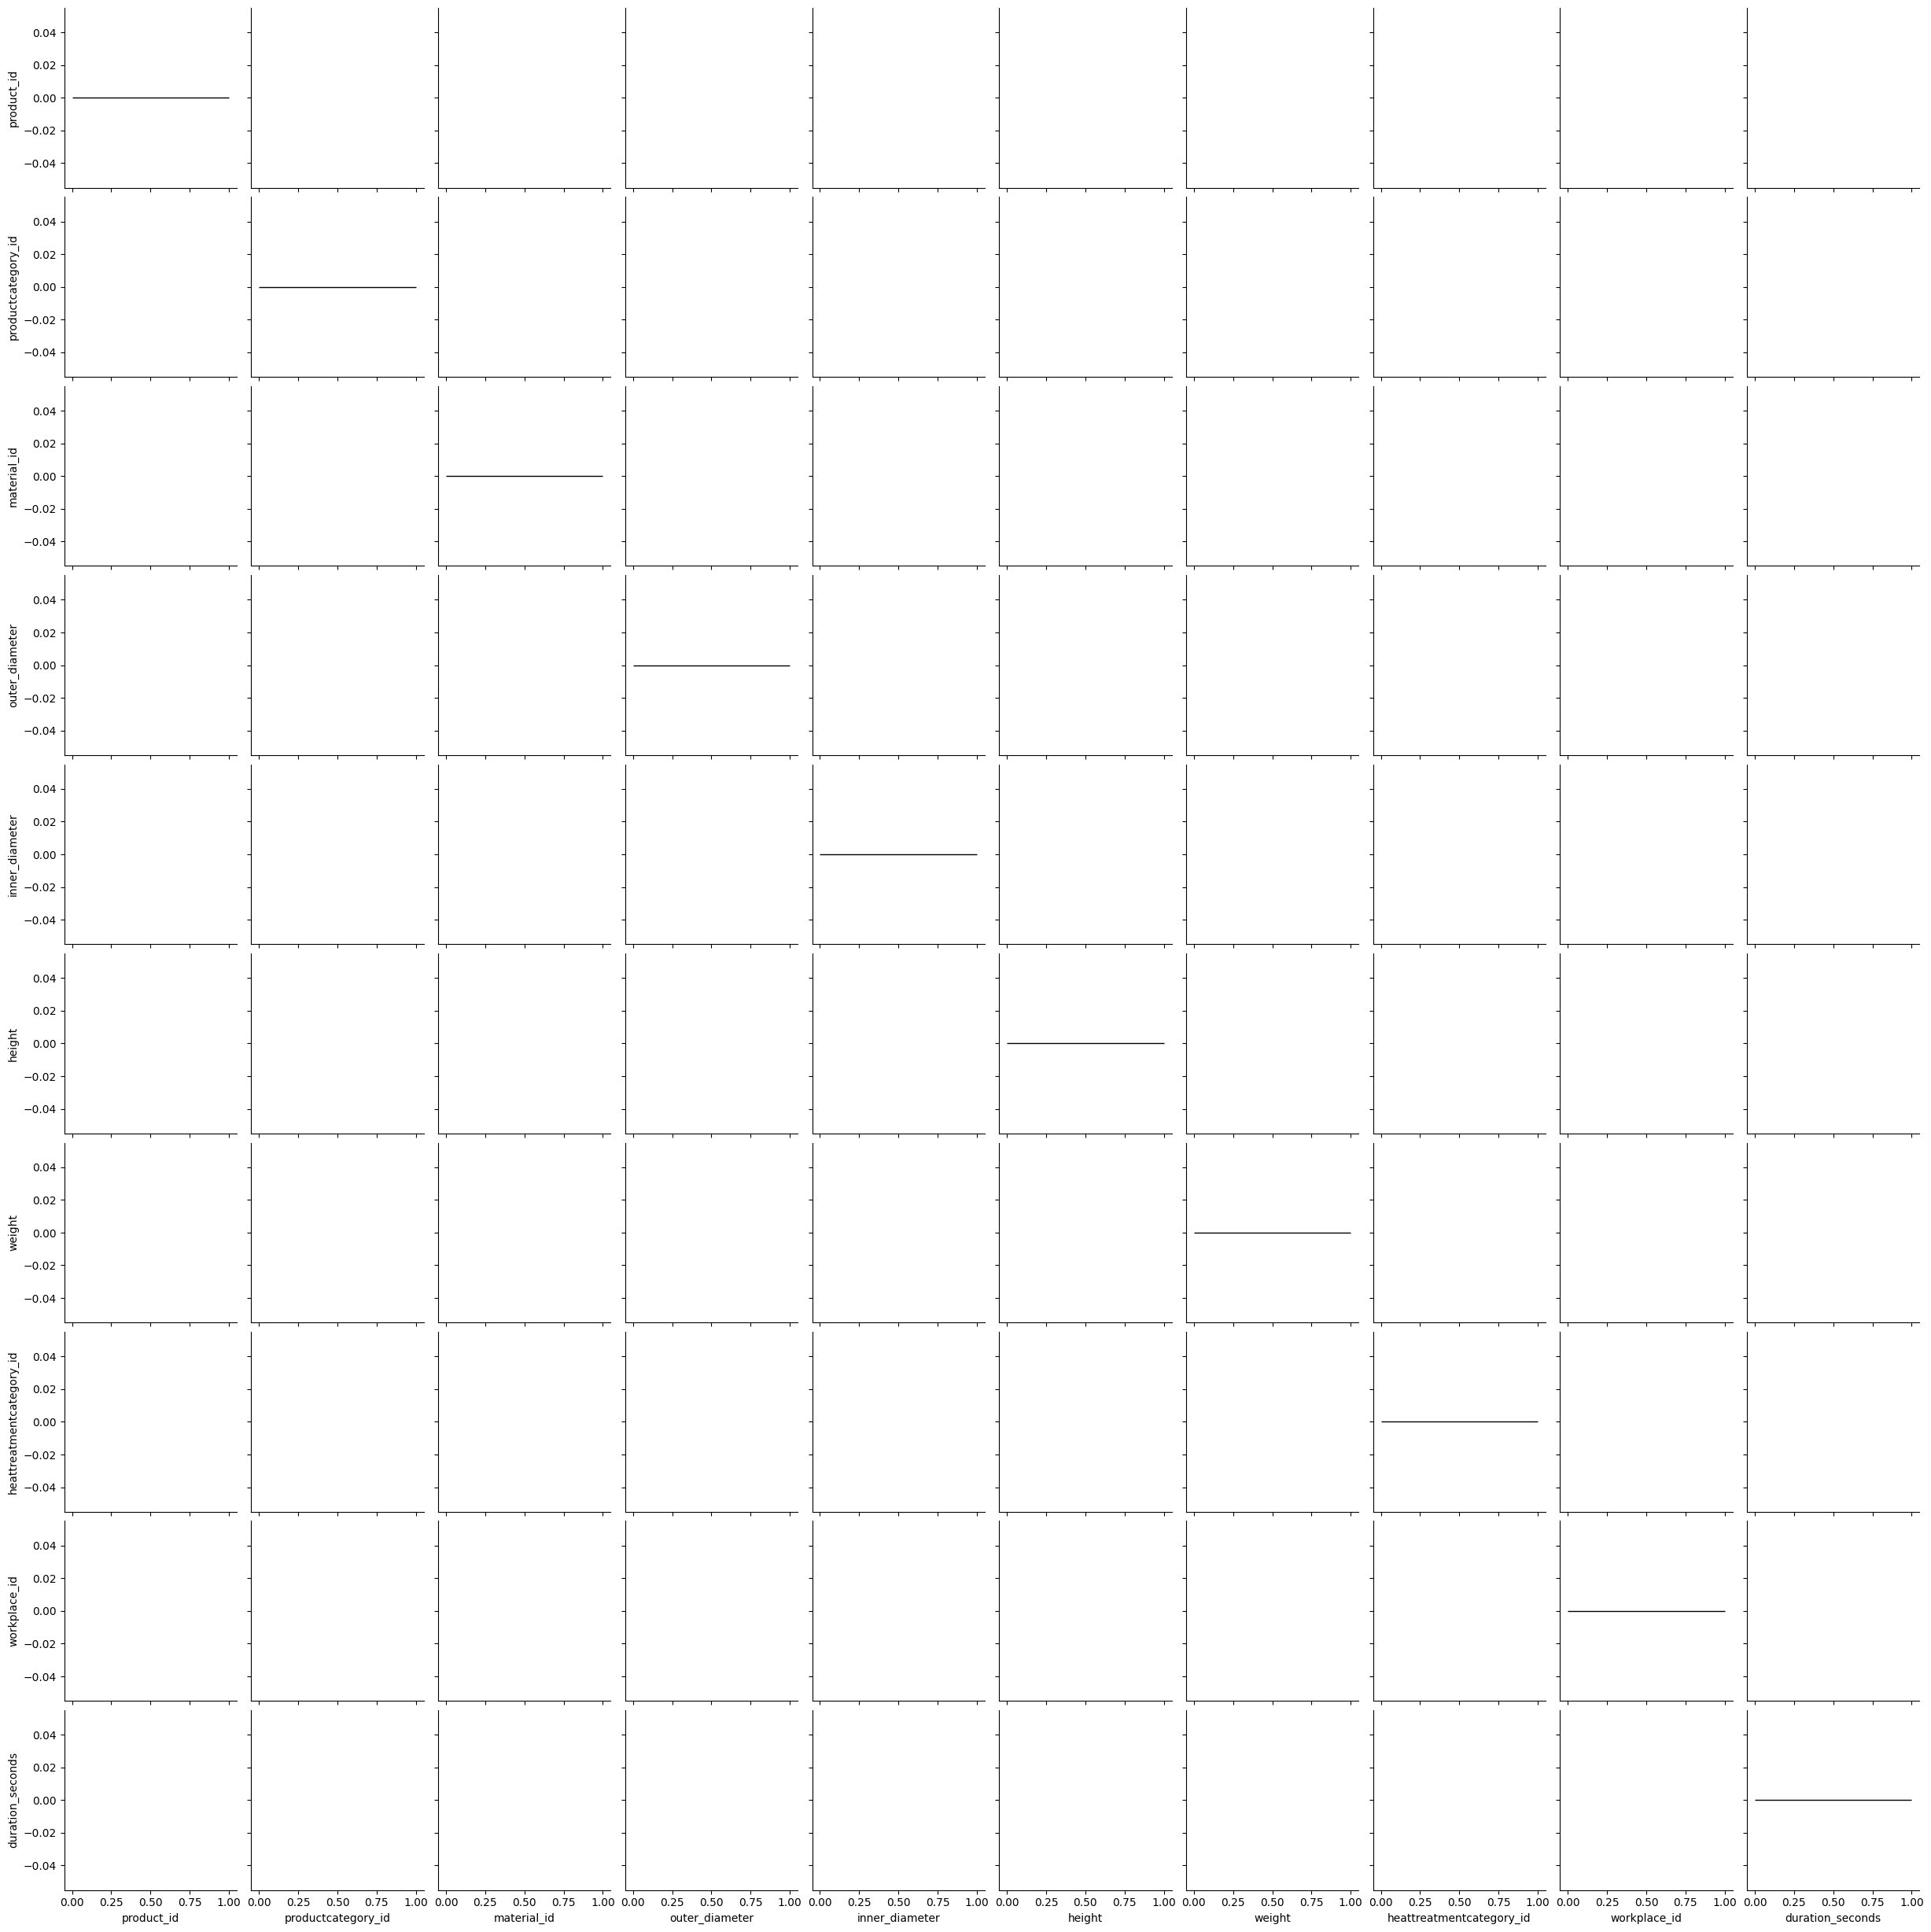

In [35]:
sns.pairplot(duration)
plt.show()

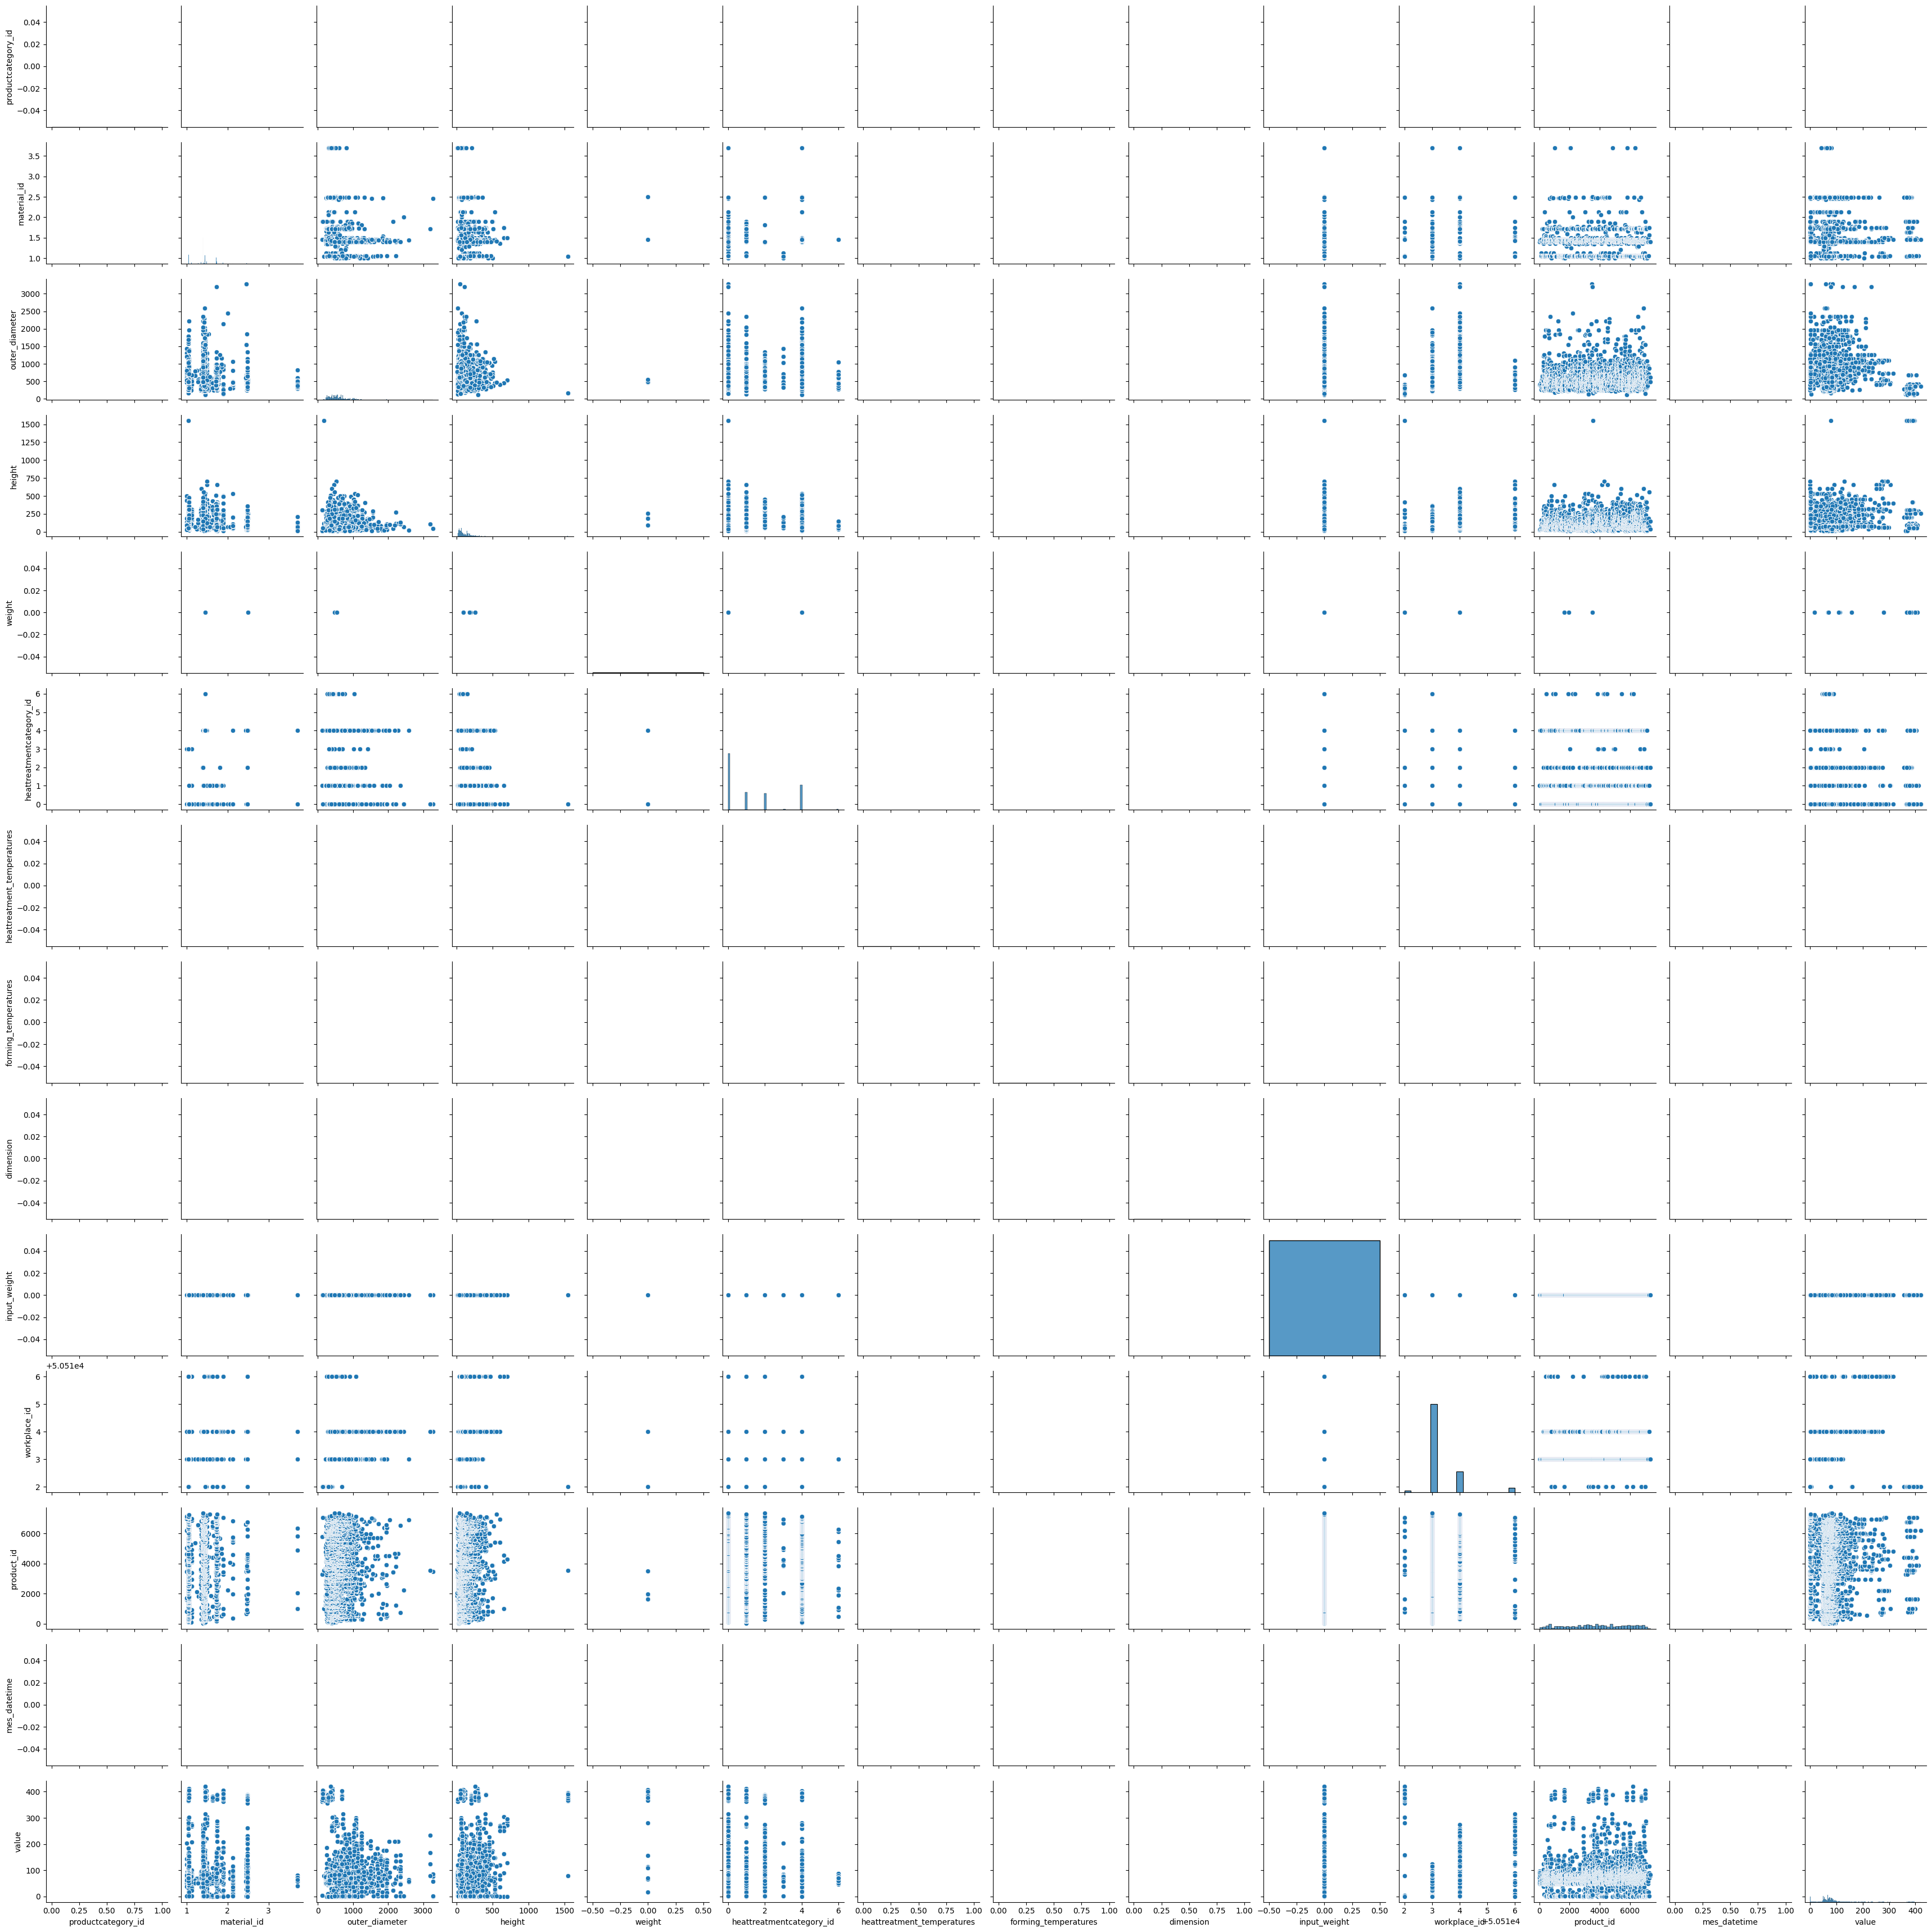

In [36]:
sns.pairplot(stainless_steel_energy)
plt.show()
